In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych//OMAMA/GP2/GP2TOYEXAMPLE_LARGE/masks.npy')

In [3]:
X_test = images[8000:10000]
y_test = masks[8000:10000]

In [4]:
images = images[:8000]
masks = masks[:8000]

In [5]:
images.shape

(8000, 512, 512, 1)

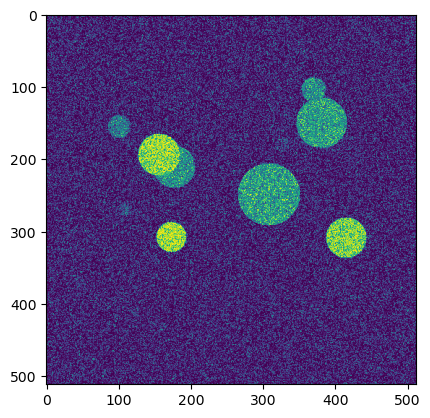

In [6]:
imshow(images[100])

In [7]:
masks.shape

(8000, 512, 512, 1)

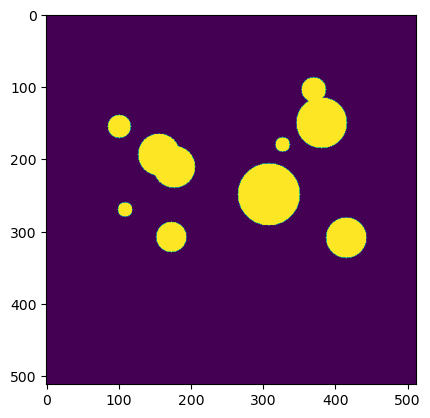

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpk6huw599kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpir7ub0kxkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpir7ub0kxkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=5, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_2_5_Example1.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
25/25 [==============================] - 28s 734ms/step - loss: 0.0721 - dice_coeff: 0.8575 - val_loss: 0.0486 - val_dice_coeff: 0.8911
Epoch 2/100
25/25 [==============================] - 17s 681ms/step - loss: 0.0500 - dice_coeff: 0.8786 - val_loss: 0.0432 - val_dice_coeff: 0.8982
Epoch 3/100
25/25 [==============================] - 17s 679ms/step - loss: 0.0464 - dice_coeff: 0.8855 - val_loss: 0.0421 - val_dice_coeff: 0.9027
Epoch 4/100
25/25 [==============================] - 17s 684ms/step - loss: 0.0448 - dice_coeff: 0.8910 - val_loss: 0.0415 - val_dice_coeff: 0.8934
Epoch 5/100
25/25 [==============================] - 17s 679ms/step - loss: 0.0447 - dice_coeff: 0.8906 - val_loss: 0.0415 - val_dice_coeff: 0.9038
Epoch 6/100
25/25 [==============================] - 17s 685ms/step - loss: 0.0444 - dice_coeff: 0.8921 - val_loss: 0.0423 - val_dice_coeff: 0.8872
Epoch 7/100
25/25 [==============================] - 17s 681ms/step 

In [16]:
R.classifier_scores

[[0.041063033044338226, 0.8928015232086182],
 [0.0412786602973938, 0.8872817158699036],
 [0.03979010507464409, 0.9019454717636108],
 [0.039863649755716324, 0.8920777440071106],
 [0.038954053074121475, 0.8985263109207153]]

In [17]:
R.discriminator_scores

[[0.15253038704395294, 0.9666666388511658],
 [0.22674232721328735, 0.9583333134651184],
 [0.10265880078077316, 0.9729166626930237],
 [0.27397724986076355, 0.949999988079071],
 [0.3908659815788269, 0.9416666626930237]]

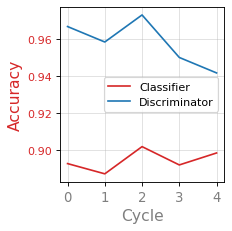

In [18]:
R.plot()

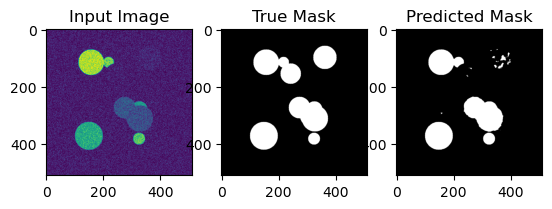

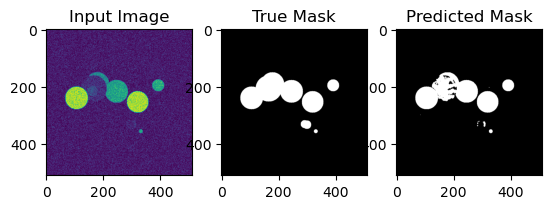

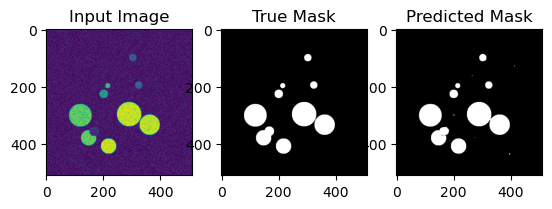

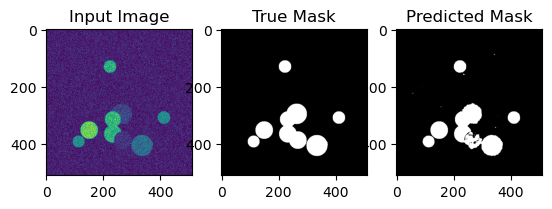

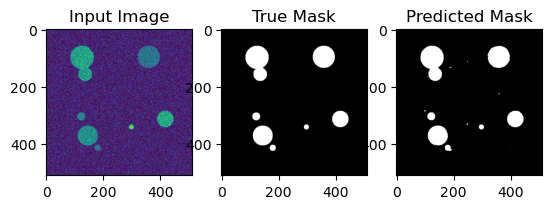

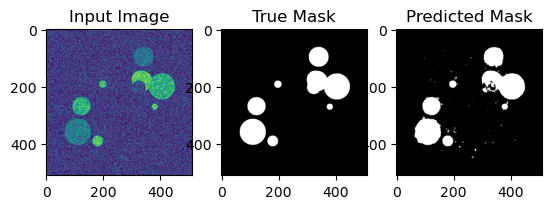

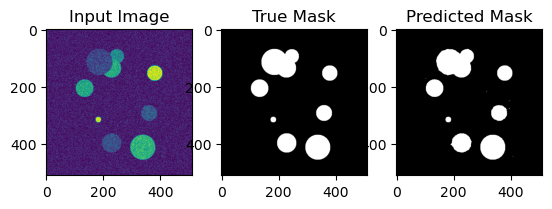

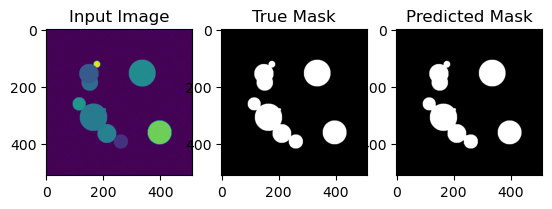

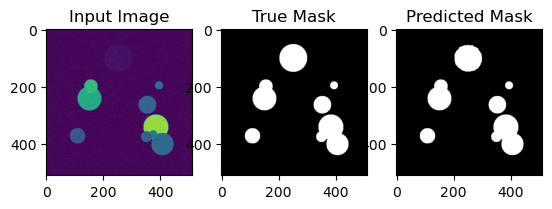

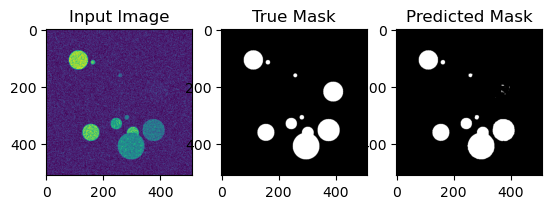

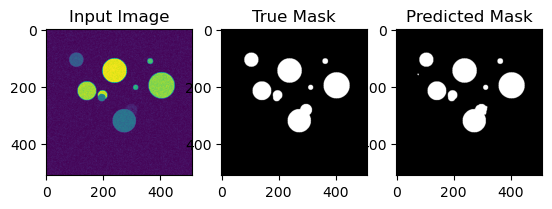

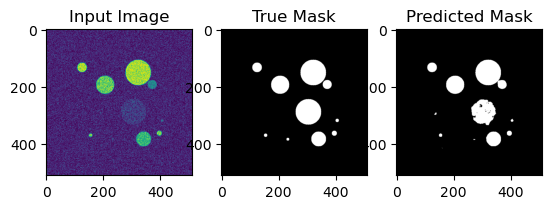

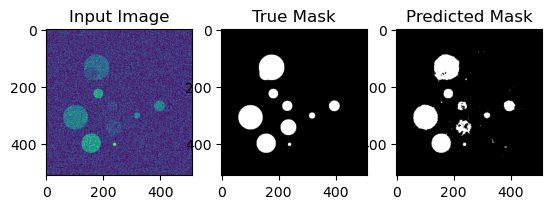

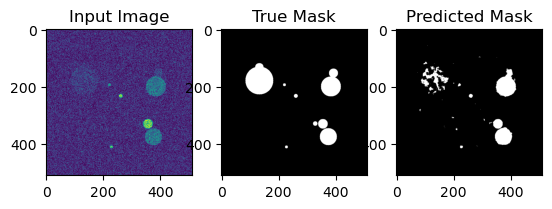

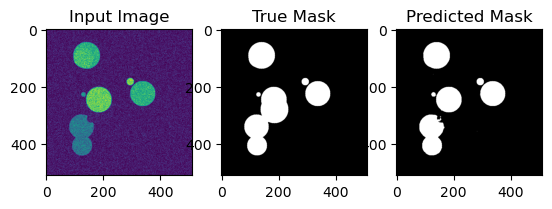

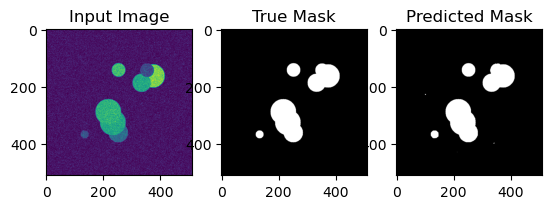

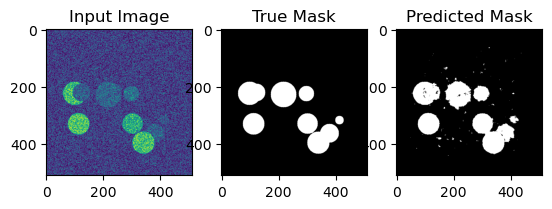

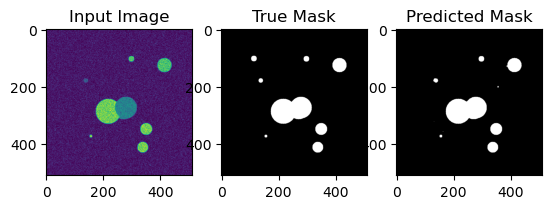

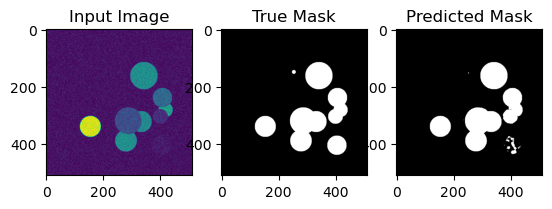

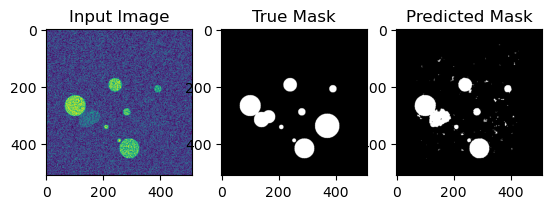

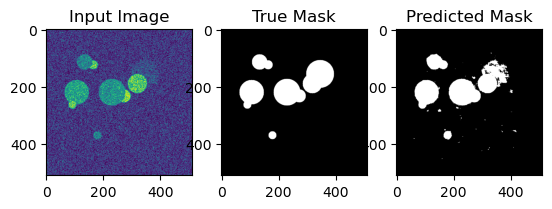

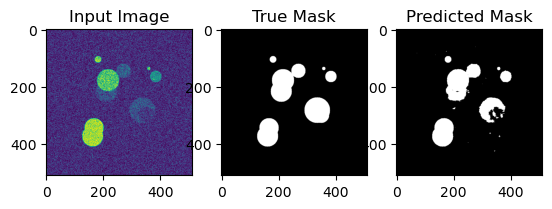

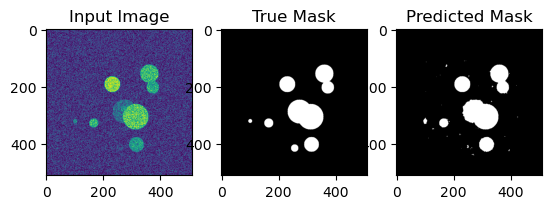

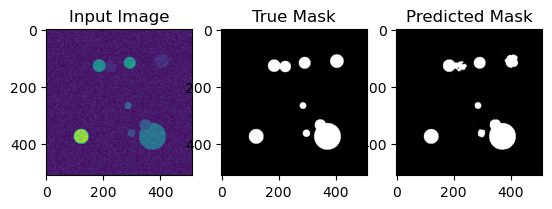

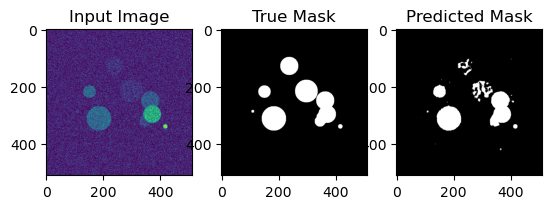

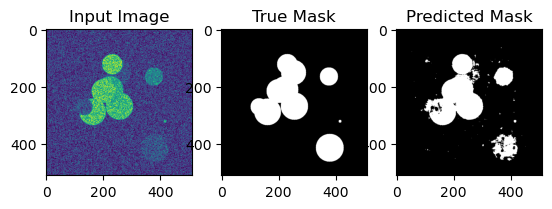

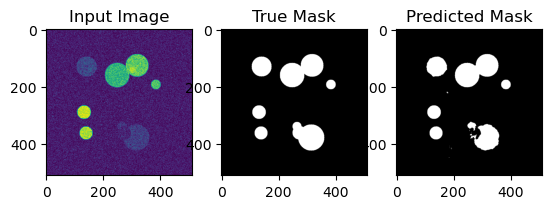

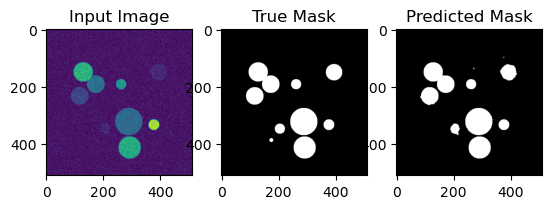

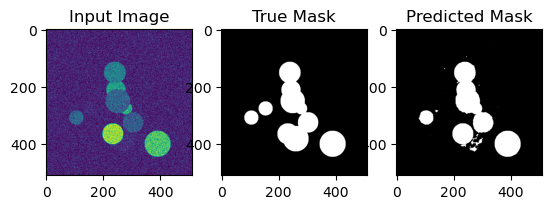

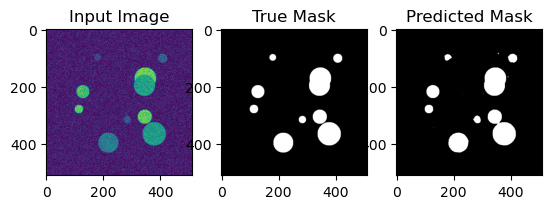

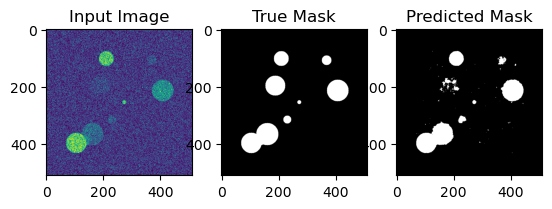

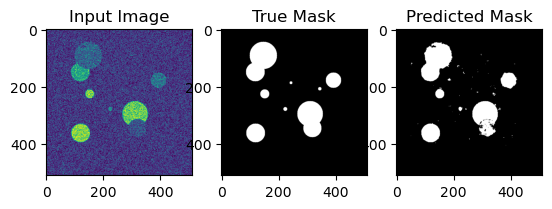

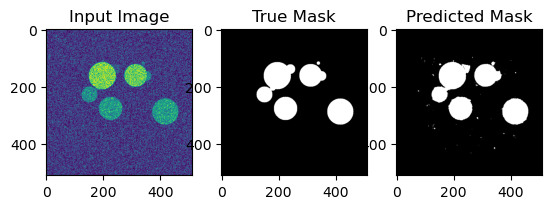

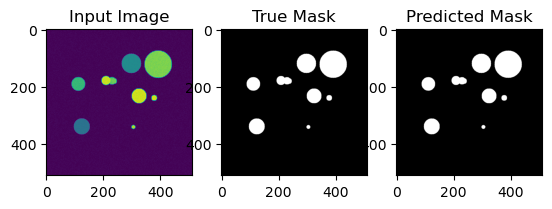

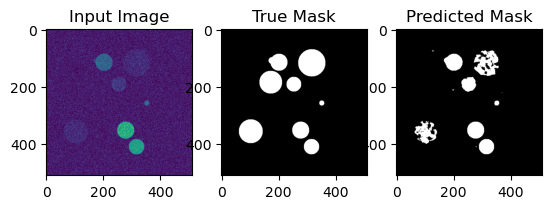

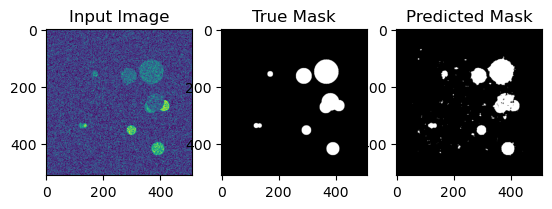

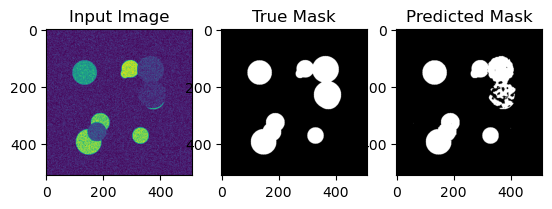

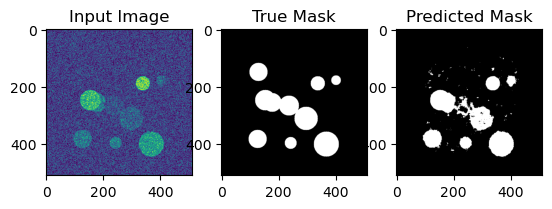

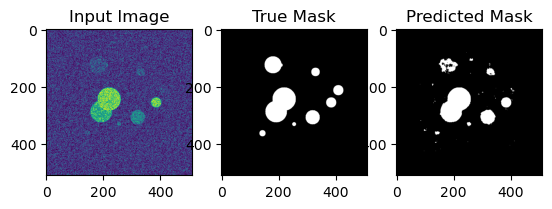

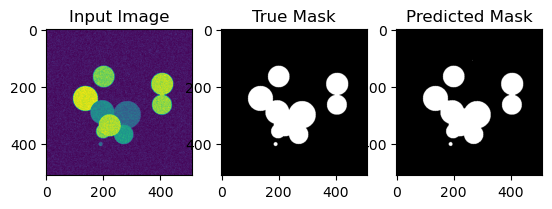

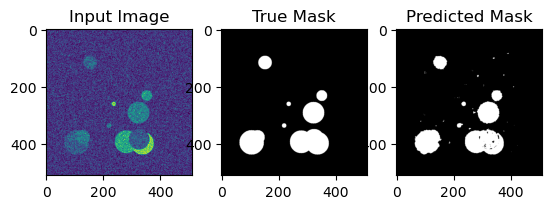

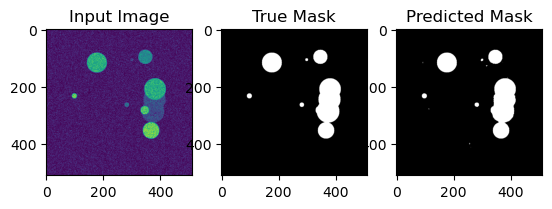

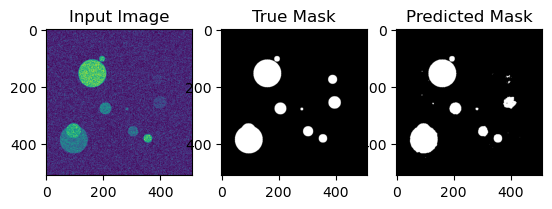

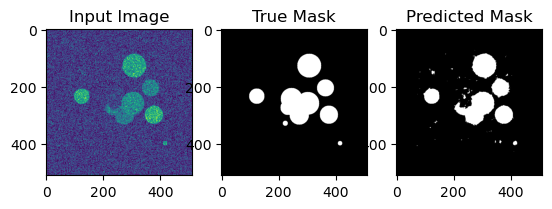

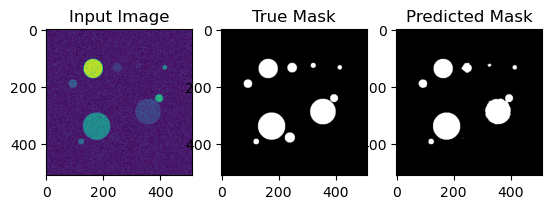

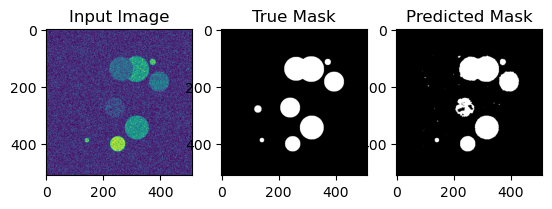

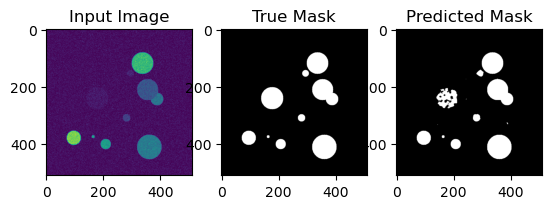

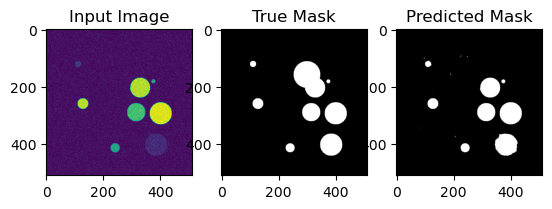

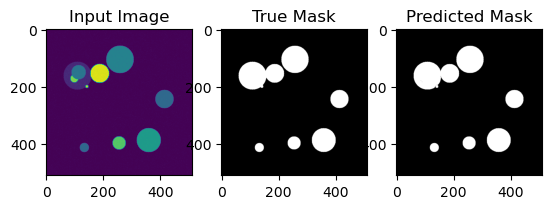

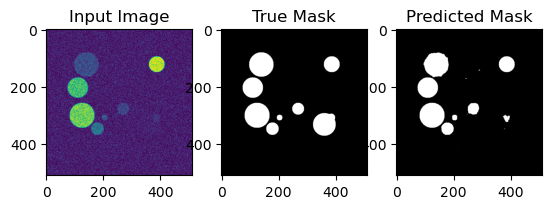

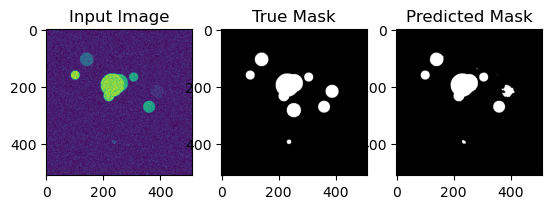

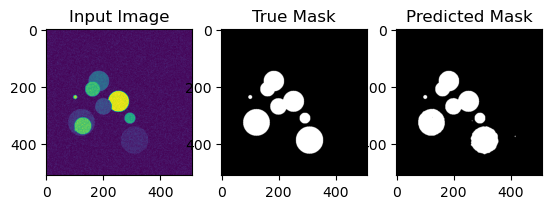

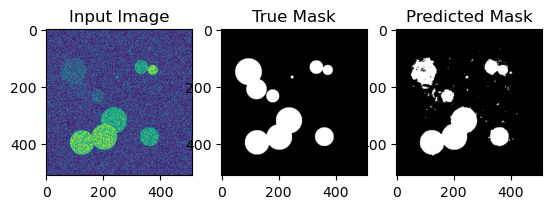

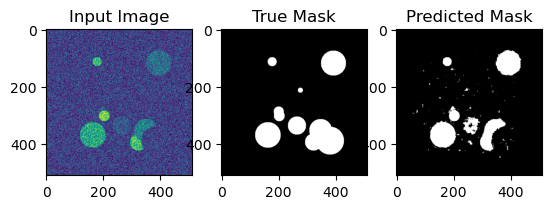

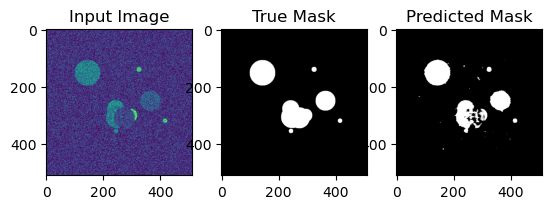

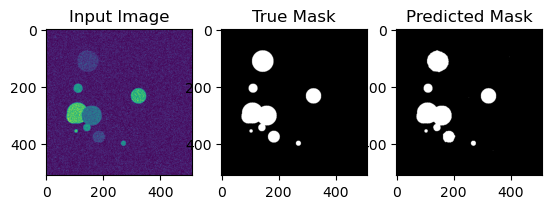

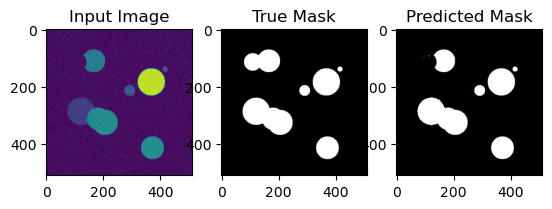

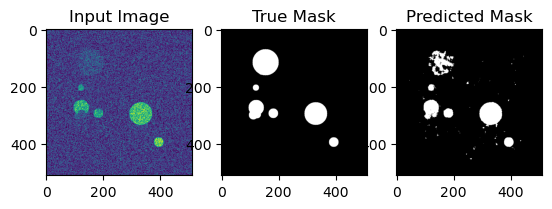

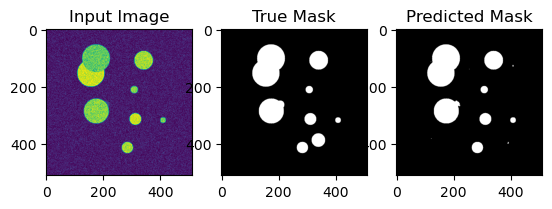

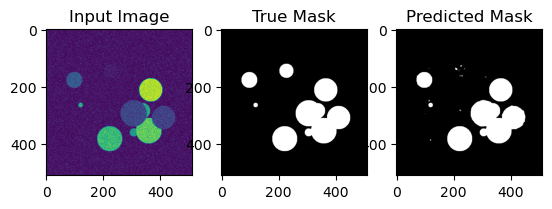

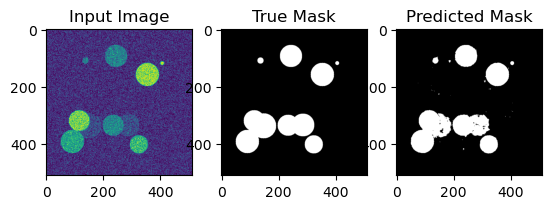

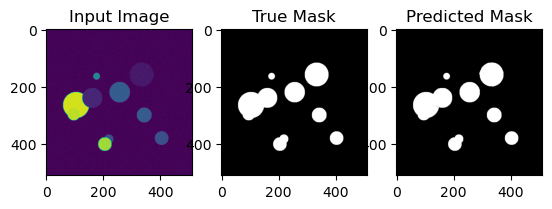

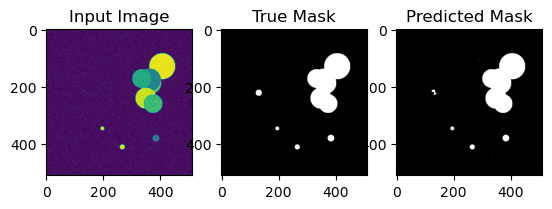

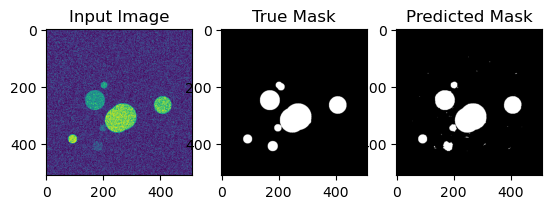

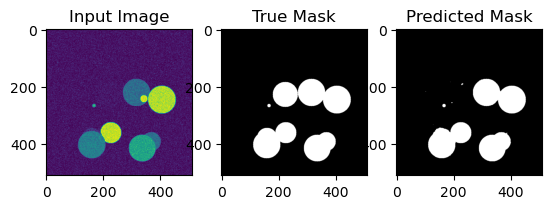

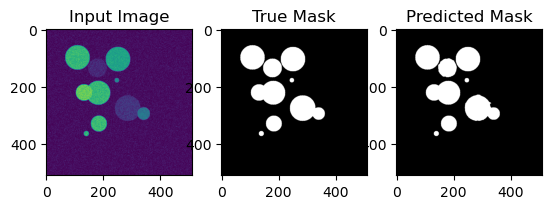

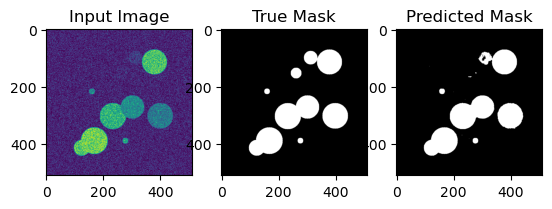

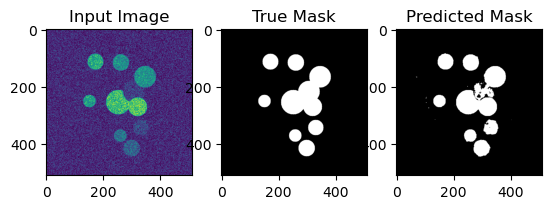

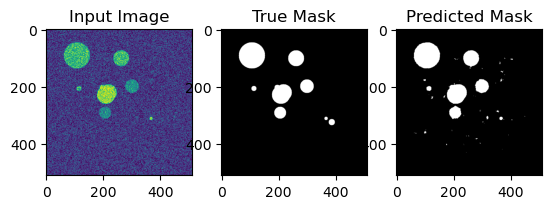

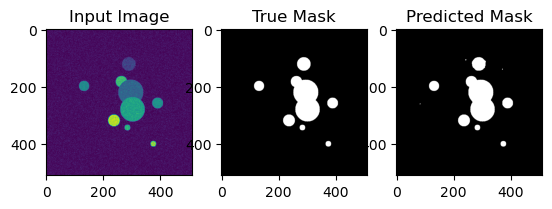

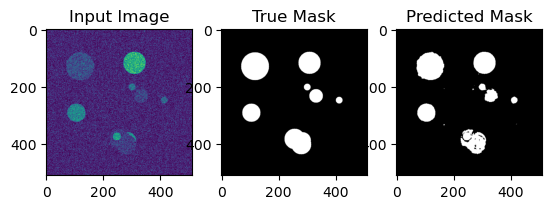

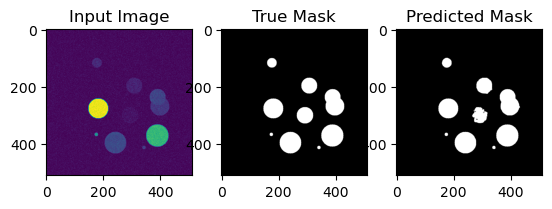

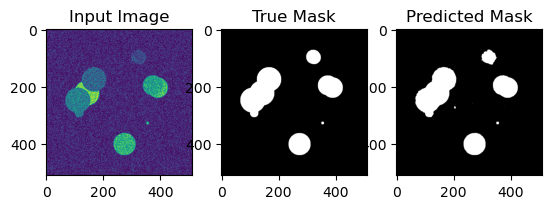

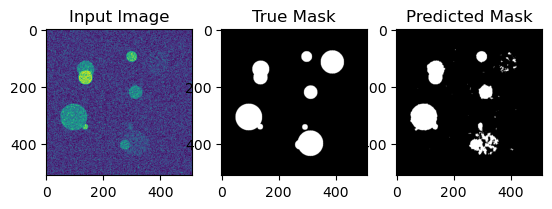

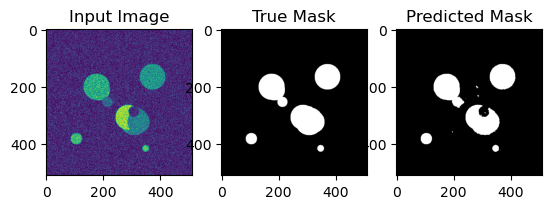

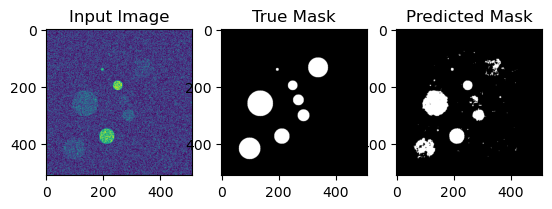

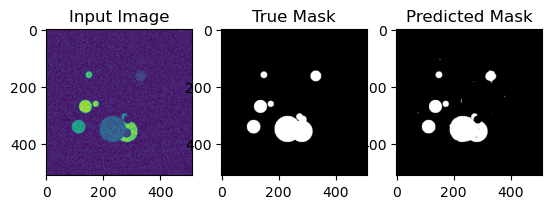

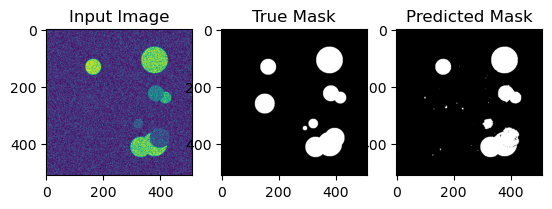

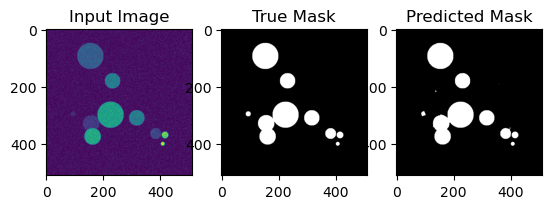

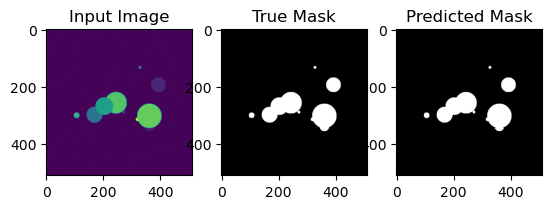

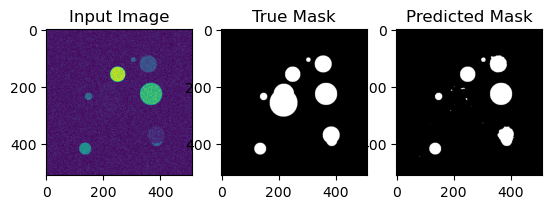

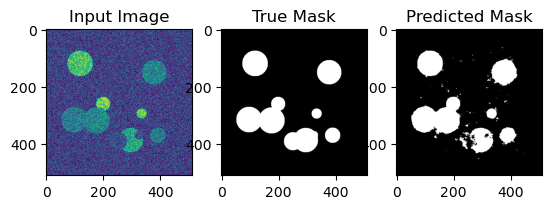

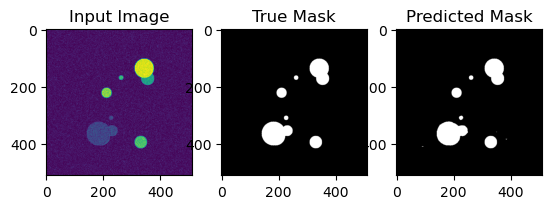

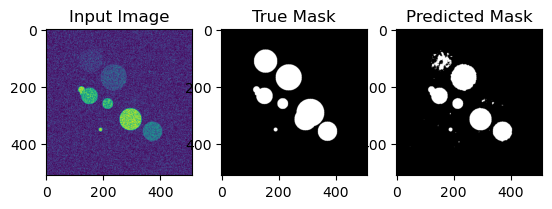

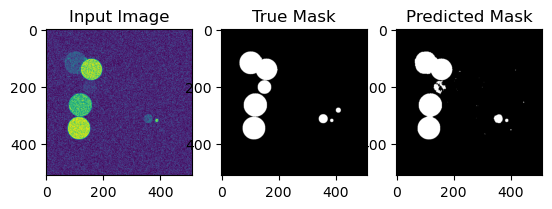

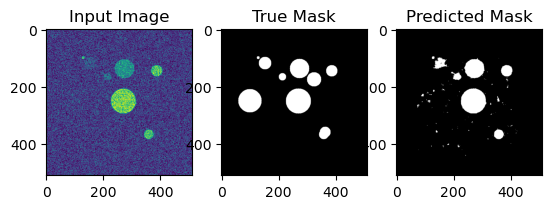

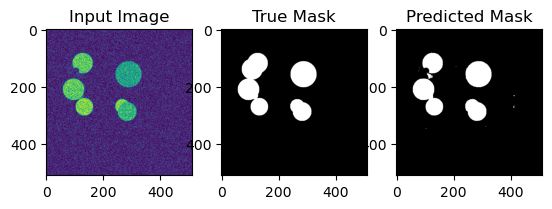

In [ ]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [ ]:
y_pred = R.classifier.predict(X_test, y_test)

In [ ]:
y_pred

In [ ]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpk6huw599kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

In [ ]:
barebone_pred = BareBone.predict(X_test, y_test)

In [ ]:
barebone_pred

In [ ]:
R.classifier.model.metrics_names

In [ ]:
BareBone.model.metrics_names